In [ ]:
Notebook for https://www.meetup.com/python-plus-data-science/events/277350707/

In [56]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['axes.grid'] = True



file = 'retail_sales.csv'


In [17]:
df = pd.read_csv(file, parse_dates=['ds'], index_col='ds')
df.info()

df.tail(20) # series is monthly on the first of the month

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 1992-01-01 to 2016-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       293 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


,y
ds,
2014-10-01,437702
2014-11-01,437910
2014-12-01,501232
2015-01-01,397252
2015-02-01,386935
2015-03-01,444110
2015-04-01,438217
2015-05-01,462615
2015-06-01,448229


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 1992-01-01 to 2016-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       293 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


<AxesSubplot:title={'center':'Retail Sales'}, xlabel='ds'>

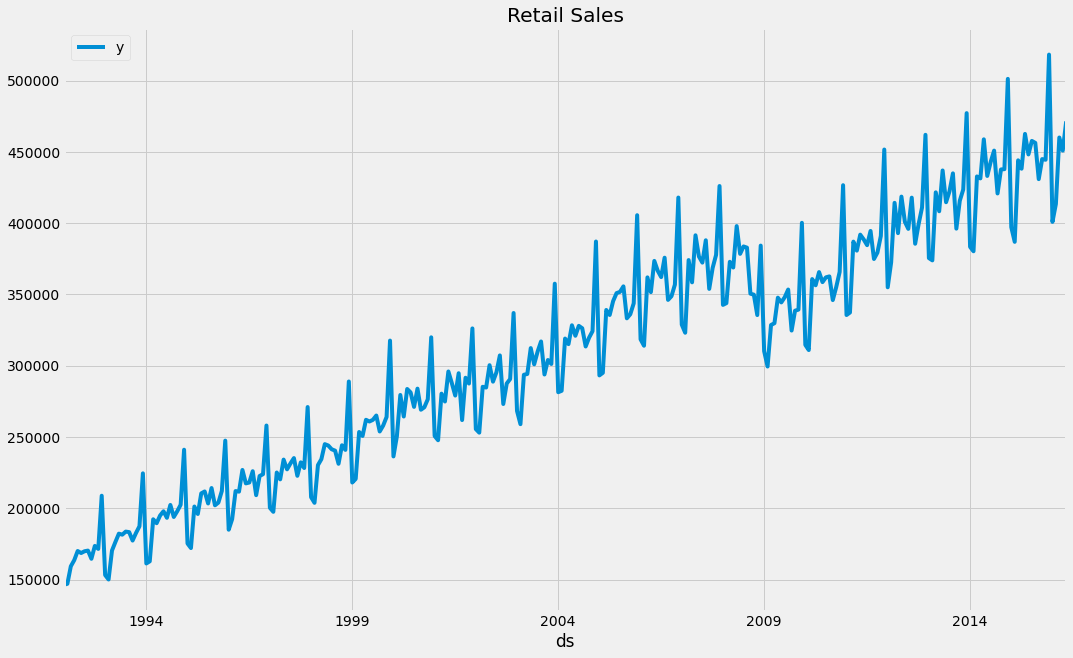

In [7]:

fig, ax = plt.subplots()
ax.set_title('Retail Sales')
df.plot(ax=ax)

# Note: # there is a significant changepoint around the 2008 financial crisis

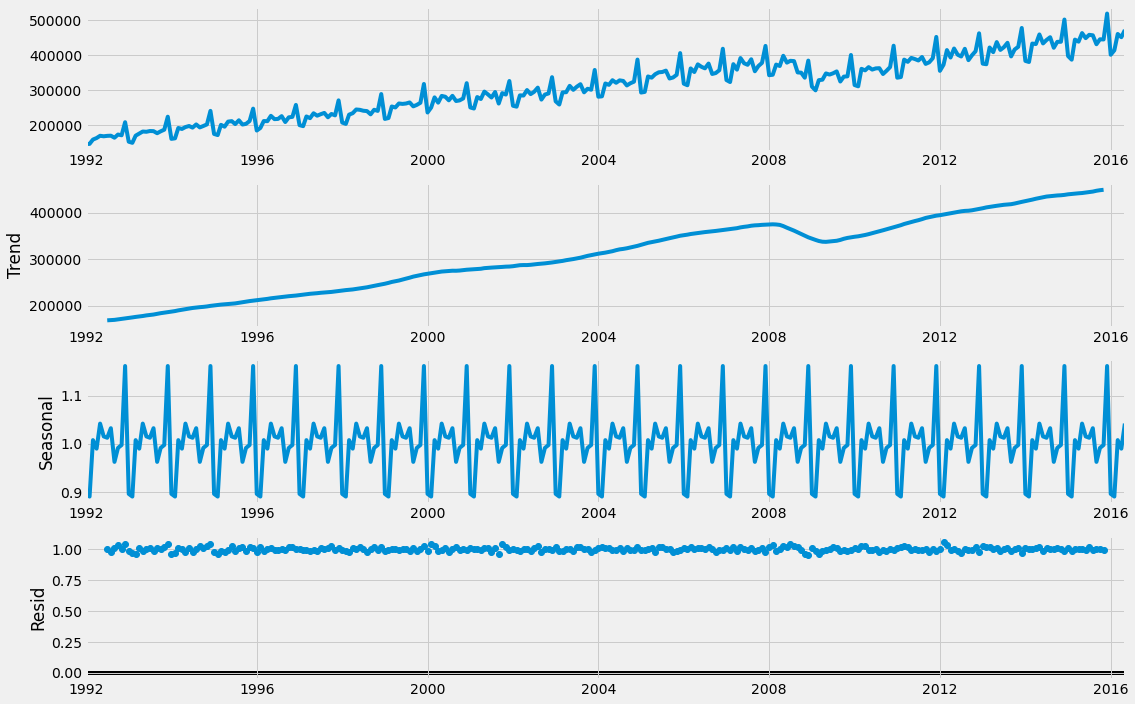

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

try:
    result = seasonal_decompose(df[['y']], model='multiplicative')
    result.plot()
except Exception as e:
    print(e)

# Notice the seasonal trend is IDENTICAL in all periods

In [10]:
from statsmodels.tsa.seasonal import STL
# STL is a versatile and robust method for decomposing time series. 
# STL is an acronym for “Seasonal and Trend decomposition using Loess”, while loess is a method for estimating nonlinear relationships

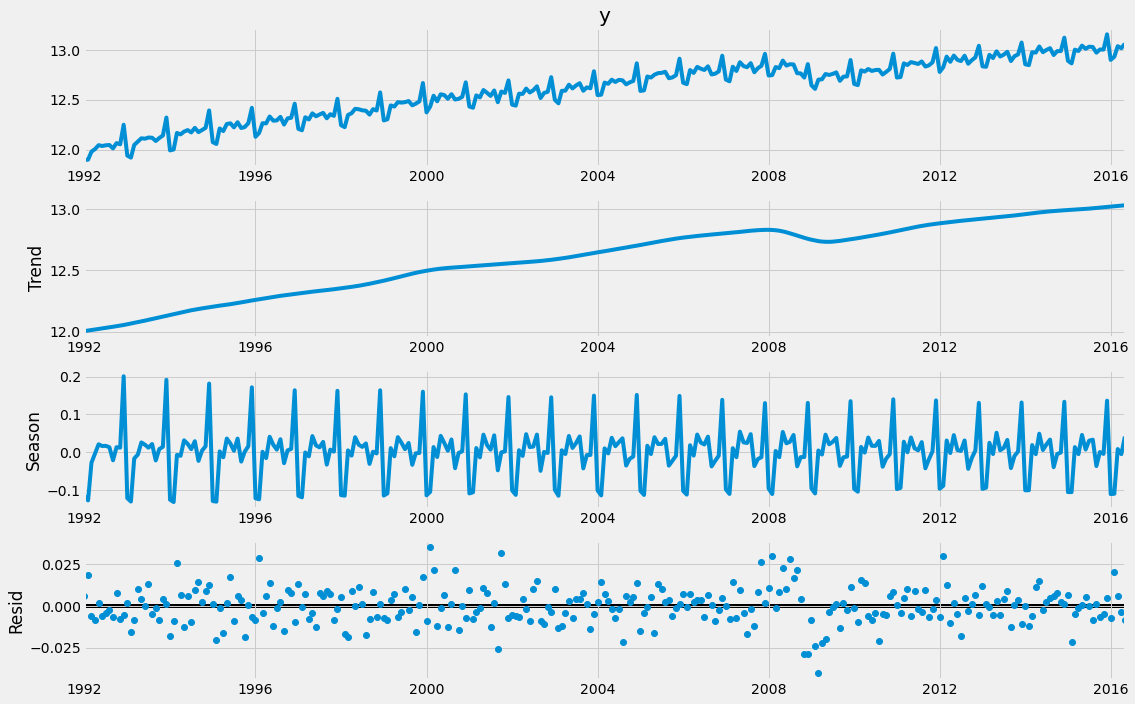

In [12]:
_ = STL(np.log(df['y'])).fit().plot()

# We have taken the log of the data to fit a multiplicative model like the seasonal_decompose function above
# Notice the seasonal trend is NOT IDENTICAL in all periods
# You should Prefer STL over seasonal_decompose for live use cases

In [133]:
from neuralprophet import NeuralProphet
m = NeuralProphet(seasonality_mode='multiplicative') # the NeuralProphet model object

df.loc[:,'ds'] = df.index #NeuralProphet requires a column called 'ds' and a column called 'y'

metrics = m.fit(df, freq='MS') # the model has now been fitted using the data

metrics #metrics contains info on the model errors 

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 192


  0%|          | 0/224 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.43E-01, min: 8.39E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 5.55E-01
Epoch[192/192]: 100%|██████████| 192/192 [00:38<00:00,  4.99it/s, SmoothL1Loss=0.000348, MAE=5.6e+3, MSE=6.2e+7, RegLoss=0]  


,SmoothL1Loss,MAE,MSE,RegLoss
0,0.273952,184587.805591,5.844401e+10,0.0
1,0.223501,160031.265570,4.816316e+10,0.0
2,0.159436,129020.810642,3.347336e+10,0.0
3,0.097150,97973.723036,1.918225e+10,0.0
4,0.046608,70775.459687,8.398166e+09,0.0
...,...,...,...,...
187,0.000349,5617.291982,6.225605e+07,0.0
188,0.000349,5609.137991,6.214559e+07,0.0
189,0.000348,5606.609630,6.208397e+07,0.0
190,0.000348,5604.046204,6.204182e+07,0.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 1992-01-01 to 2016-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       293 non-null    int64         
 1   ds      293 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.9 KB


In [134]:
future = m.make_future_dataframe(df, periods=5) #notice the dates have changed to EOM. Nobody's perfect.
print(type(future))
future.info()
future

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        5 non-null      datetime64[ns]
 1   y         0 non-null      object        
 2   t         5 non-null      float64       
 3   y_scaled  0 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 288.0+ bytes


,ds,y,t,y_scaled
0,2016-06-01,None,1.003488,NaN
1,2016-07-01,None,1.006864,NaN
2,2016-08-01,None,1.010352,NaN
3,2016-09-01,None,1.013840,NaN
4,2016-10-01,None,1.017216,NaN


In [135]:
forecast = m.predict(future)
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,2016-06-01,None,463923.946406,NaN,458041.739490,0.018873
1,2016-07-01,None,467496.182523,NaN,459178.678799,0.026590
2,2016-08-01,None,477610.927388,NaN,460353.525577,0.054964
3,2016-09-01,None,440439.717856,NaN,461528.301168,-0.066916
4,2016-10-01,None,454921.011580,NaN,462665.240477,-0.024485


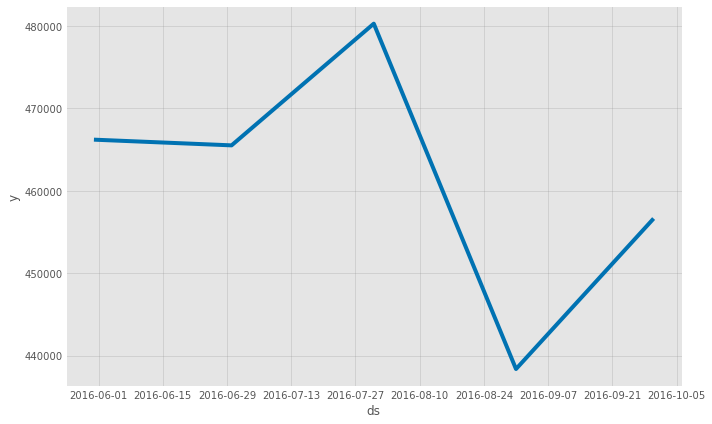

In [116]:
plt.style.use('ggplot')
fig_forecast = m.plot(forecast)


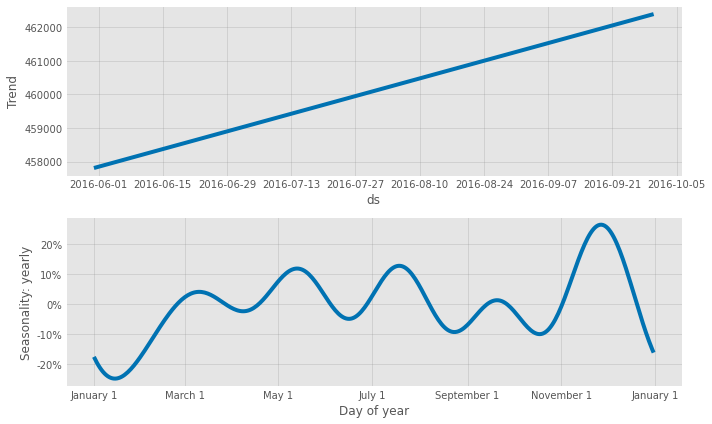

In [117]:
fig_components = m.plot_components(forecast)


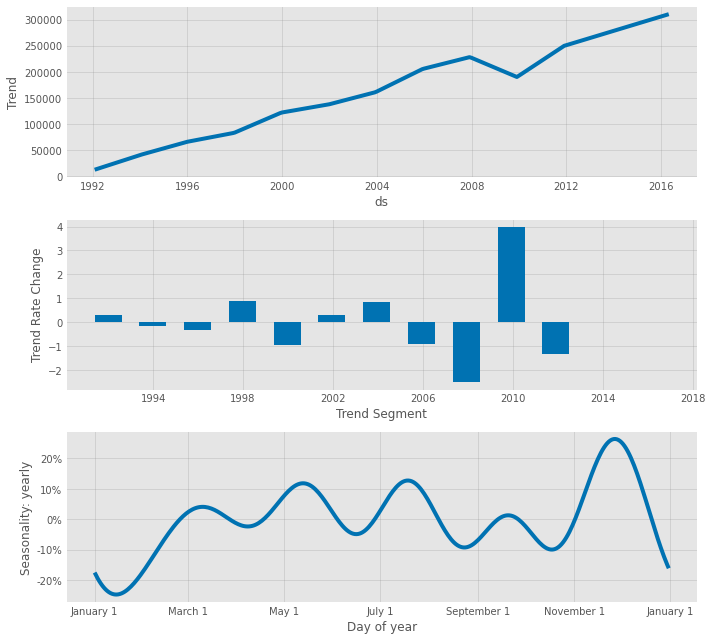

In [118]:
fig_model = m.plot_parameters()

In [137]:
df_train, df_val = m.split_df(df.sort_index(), valid_p=0.1, freq='MS') #MAKE SURE THE INDEX IS SORTED. DON'T FORGET! (why??)

In [138]:
df_train.info()
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       264 non-null    int64         
 1   ds      264 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       29 non-null     int64         
 1   ds      29 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 592.0 bytes


In [139]:
train_metrics = m.fit(df_train, freq='MS')


WARNING - (NP.forecaster.fit) - Model has already been fitted. Re-fitting will produce different results.
Epoch[192/192]: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, SmoothL1Loss=0.000354, MAE=5.59e+3, MSE=6.31e+7, RegLoss=0]


In [140]:
val_metrics = m.test(df_val)  #out of sample loss is a little worse on the test set than it was before.
val_metrics

INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss      MAE          MSE
1         0.001 8402.165 94523575.684


,SmoothL1Loss,MAE,MSE
0,0.00053,8402.164964,9.452358e+07


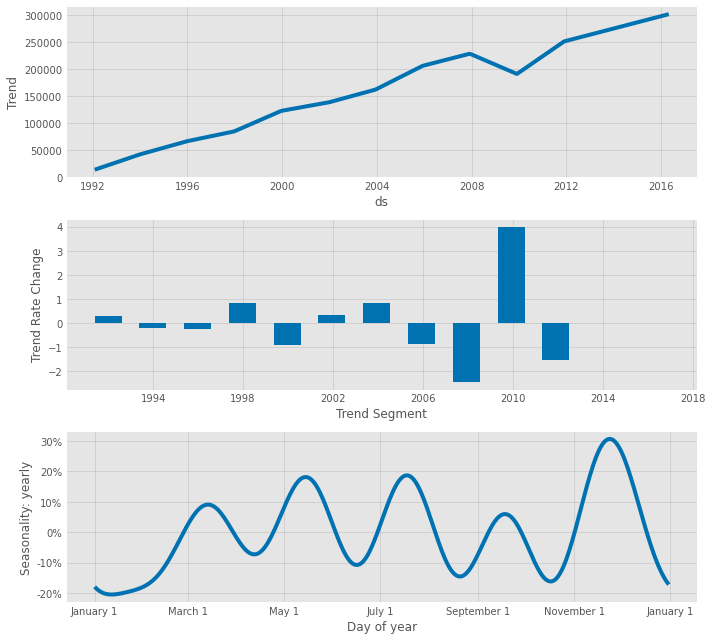

In [123]:
fig_model = m.plot_parameters()

# Beyond the default model. Hyperparameter tuning
http://neuralprophet.com/hyperparameter-selection/

There are a lot of parameters in the NeuralProphet model object!

# NeuralProphet??
'''
   def __init__(
        self,
        growth="linear",
        changepoints=None,
        n_changepoints=10,
        changepoints_range=0.9,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality="auto",
        weekly_seasonality="auto",
        daily_seasonality="auto",
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        num_hidden_layers=0,
        d_hidden=None,
        ar_sparsity=None,
        learning_rate=None,
        epochs=None,
        batch_size=None,
        loss_func="Huber",
        optimizer="AdamW",
        train_speed=None,
        normalize="auto",
        impute_missing=True,
    ):
'''

"""
        Args:
            ## Trend Config
            growth (str): ['off', 'linear'] to specify
                no trend or a linear trend.
                Note: 'discontinuous' setting is actually not a trend per se. only use if you know what you do.
            changepoints list: Dates at which to include potential changepoints.
                If not specified, potential changepoints are selected automatically.
                data format: list of str, list of np.datetimes, np.array of np.datetimes (not np.array of np.str)
            n_changepoints (int): Number of potential changepoints to include.
                Changepoints are selected uniformly from the first `changepoint_range` proportion of the history.
                Not used if input `changepoints` is supplied. If `changepoints` is not supplied.
            changepoints_range (float): Proportion of history in which trend changepoints will
                be estimated. Defaults to 0.8 for the first 80%. Not used if `changepoints` is specified.
            trend_reg (float): Parameter modulating the flexibility of the automatic changepoint selection.
                Large values (~1-100) will limit the variability of changepoints.
                Small values (~0.001-1.0) will allow changepoints to change faster.
                default: 0 will fully fit a trend to each segment.
            trend_reg_threshold (bool, float): Allowance for trend to change without regularization.
                True: Automatically set to a value that leads to a smooth trend.
                False: All changes in changepoints are regularized

            ## Seasonality Config
            yearly_seasonality (bool, int): Fit yearly seasonality.
                Can be 'auto', True, False, or a number of Fourier/linear terms to generate.
            weekly_seasonality (bool, int): Fit monthly seasonality.
                Can be 'auto', True, False, or a number of Fourier/linear terms to generate.
            daily_seasonality (bool, int): Fit daily seasonality.
                Can be 'auto', True, False, or a number of Fourier/linear terms to generate.
            seasonality_mode (str): 'additive' (default) or 'multiplicative'.
            seasonality_reg (float): Parameter modulating the strength of the seasonality model.
                Smaller values (~0.1-1) allow the model to fit larger seasonal fluctuations,
                larger values (~1-100) dampen the seasonality.
                default: None, no regularization

            ## AR Config
            n_lags (int): Previous time series steps to include in auto-regression. Aka AR-order
            ar_sparsity (float): [0-1], how much sparsity to enduce in the AR-coefficients.
                Should be around (# nonzero components) / (AR order), eg. 3/100 = 0.03

            ## Model Config
            n_forecasts (int): Number of steps ahead of prediction time step to forecast.
            num_hidden_layers (int): number of hidden layer to include in AR-Net. defaults to 0.
            d_hidden (int): dimension of hidden layers of the AR-Net. Ignored if num_hidden_layers == 0.

            ## Train Config
            learning_rate (float): Maximum learning rate setting for 1cycle policy scheduler.
                default: None: Automatically sets the learning_rate based on a learning rate range test.
                For manual values, try values ~0.001-10.
            epochs (int): Number of epochs (complete iterations over dataset) to train model.
                default: None: Automatically sets the number of epochs based on dataset size.
                    For best results also leave batch_size to None.
                For manual values, try ~5-500.
            batch_size (int): Number of samples per mini-batch.
                default: None: Automatically sets the batch_size based on dataset size.
                    For best results also leave epochs to None.
                For manual values, try ~1-512.
            loss_func (str, torch.nn.modules.loss._Loss, 'typing.Callable'):
                Type of loss to use: str ['Huber', 'MSE'],
                or torch loss or callable for custom loss, eg. asymmetric Huber loss
            train_speed (int, float) a quick setting to speed up or slow down model fitting [-3, -2, -1, 0, 1, 2, 3]
                potentially useful when under-, over-fitting, or simply in a hurry.
                applies epochs *= 2**-train_speed, batch_size *= 2**train_speed, learning_rate *= 2**train_speed,
                default None: equivalent to 0.

            ## Data config
            normalize (str): Type of normalization to apply to the time series.
                options: ['auto', 'soft', 'off', 'minmax, 'standardize']
                default: 'auto' uses 'minmax' if variable is binary, else 'soft'
                'soft' scales minimum to 0.1 and the 90th quantile to 0.9
            impute_missing (bool): whether to automatically impute missing dates/values
                imputation follows a linear method up to 10 missing values, more are filled with trend.
"""

In [141]:
m = NeuralProphet(seasonality_mode='multiplicative')

metrics = m.fit(df_train, freq="MS")


INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/221 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.56E-02, min: 2.73E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.61E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:43<00:00,  4.60it/s, SmoothL1Loss=0.000499, MAE=5.93e+3, MSE=7.25e+7, RegLoss=0]


In [142]:
future = m.make_future_dataframe(df_train, n_historic_predictions=True, periods=30)
future

,y,ds,y_scaled,t
0,146376,1992-01-01,0.000000,0.000000
1,147079,1992-02-01,0.002610,0.003873
2,159336,1992-03-01,0.048113,0.007495
3,163669,1992-04-01,0.064199,0.011368
4,170068,1992-05-01,0.087955,0.015116
...,...,...,...,...
289,None,2016-02-01,NaN,1.098938
290,None,2016-03-01,NaN,1.102561
291,None,2016-04-01,NaN,1.106433
292,None,2016-05-01,NaN,1.110181


In [143]:
forecast = m.predict(future)
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,1992-01-01,146376,156587.378376,10211.378376,158736.850978,-0.173894
1,1992-02-01,147079,157501.226568,10422.226568,159957.641251,-0.180863
2,1992-03-01,159336,161494.288338,2158.288338,161099.671024,0.026802
3,1992-04-01,163669,161962.622767,-1706.377233,162320.462302,-0.022443
4,1992-05-01,170068,164949.124753,-5118.875247,163501.871823,0.084507
...,...,...,...,...,...,...
289,2016-02-01,None,418397.063354,None,478458.441246,-0.180863
290,2016-03-01,None,489153.324346,None,480206.161939,0.026802
291,2016-04-01,None,474540.326832,None,482074.361946,-0.022443
292,2016-05-01,None,512403.840872,None,483882.258074,0.084507


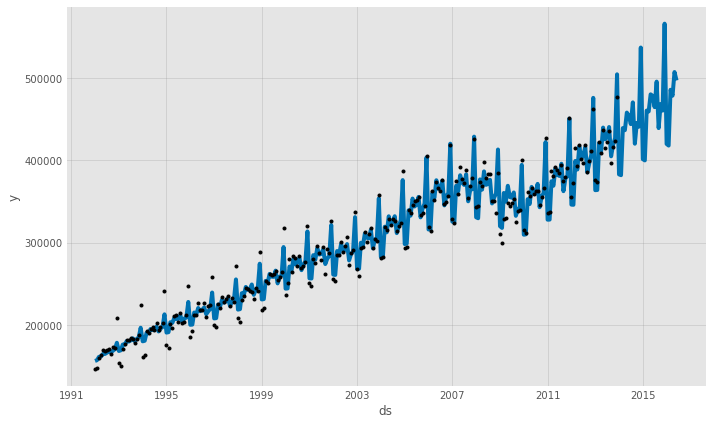

In [129]:
fig_forecast = m.plot(forecast)


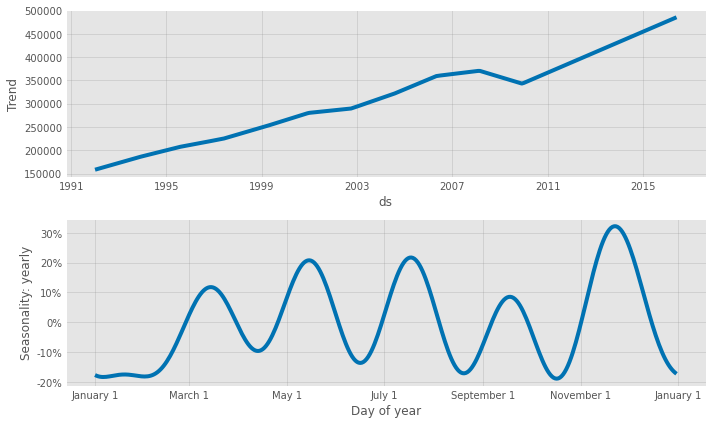

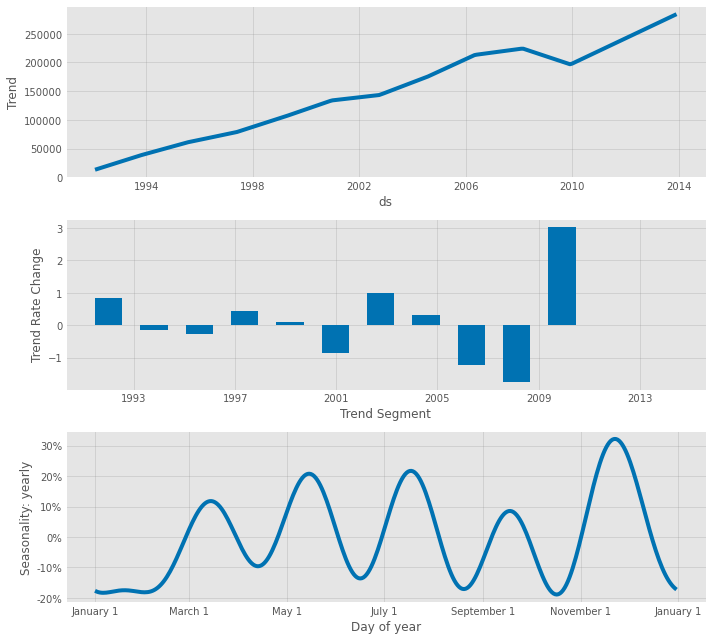

In [130]:
fig_components = m.plot_components(forecast)
fig_model = m.plot_parameters()